<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/DataManagement_06_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
import pandas as pd

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
import statistics as st

In [ ]:
## loading data from desktop
from google.colab import files
uploaded = files.upload()

Saving JMH_Data.csv to JMH_Data.csv


In [ ]:
## converting into dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['JMH_Data.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
## Calculating patient age and issue age
import numpy as np
df['AGE'] = (pd.datetime.now() - pd.to_datetime(df['DOB']))
df['AGE_ISSUE'] = (pd.datetime.now() - pd.to_datetime(df['LIST DT']))
#print(df['AGE'].dtype)
df['AGE'].astype('timedelta64[D]')
df['AGE_ISSUE'].astype('timedelta64[D]')


0        716.0
1        793.0
2        793.0
3        793.0
4        793.0
         ...  
56111    430.0
56112    430.0
56113    430.0
56114    430.0
56115    430.0
Name: AGE_ISSUE, Length: 56116, dtype: float64

In [ ]:
print(df.dtypes)

FACS #                      int64
DISP                       object
CALLS                       int64
DU413_CALLS                 int64
ZIP5                      float64
                       ...       
PROC CODE 2                object
IA SCORE                   object
Payment Status              int64
AGE               timedelta64[ns]
AGE_ISSUE         timedelta64[ns]
Length: 77, dtype: object


In [ ]:
## handling dates

df['LIST DT']=pd.to_datetime(df['LIST DT'])
df['LIST DT'] = df['LIST DT'].apply(lambda x: x.toordinal())

df['ADMIT DT']=pd.to_datetime(df['ADMIT DT'])
df['ADMIT DT'] = df['ADMIT DT'].apply(lambda x: x.toordinal())

df['DSCHG DT']=pd.to_datetime(df['DSCHG DT'])
df['DSCHG DT'] = df['DSCHG DT'].apply(lambda x: x.toordinal())

df['DOB']=pd.to_datetime(df['DOB'])
df['DOB'] = df['DOB'].apply(lambda x: x.toordinal())








In [ ]:
## Filling NaTs in datetimecolumns in priproc date and accident date


df['PRI PROC DATE']=pd.to_datetime(df['PRI PROC DATE'])
df['ACCIDENT DATE']=pd.to_datetime(df['ACCIDENT DATE'])

end = pd.to_datetime('2017-12-15')

df['PRI PROC DATE'].fillna(end,inplace=True)
df['ACCIDENT DATE'].fillna(end,inplace=True)

#df['ACCIDENT DATE'].isnull()
#df['PRI PROC DATE'].isnull()

In [ ]:
## Converting Accident Date and PriProc Date into Dates and Ordinal
df['ACCIDENT DATE']=pd.to_datetime(df['ACCIDENT DATE'])
df['ACCIDENT DATE'] = df['ACCIDENT DATE'].apply(lambda x: x.toordinal())

df['PRI PROC DATE']=pd.to_datetime(df['PRI PROC DATE'])
df['PRI PROC DATE'] = df['PRI PROC DATE'].apply(lambda x: x.toordinal())

In [ ]:
## handling object data type (looking for non numeric values in supposedly numeric columns
for x in range(0,56115):
  if (str.isdecimal(df.iloc[x,1])) == False :
    df.iloc[x,1] = st.mode(df.iloc[:,1])
  


  
  



In [ ]:
## handling blank space in supposedly numeric columns

for x in range(0,56115):
  if df.iloc[x,2] == '':  
    df.iloc[x,2] = st.mode(df.iloc[:,2])
  if df.iloc[x,3] == '':
    df.iloc[x,3] = st.mode(df.iloc[:,3])
  if df.iloc[x,4] == '':
    df.iloc[x,4] = st.mode(df.iloc[:,4])
  if df.iloc[x,5] == '':
    df.iloc[x,5] = st.mode(df.iloc[:,5])
  if df.iloc[x,9] == '':
    df.iloc[x,9] = st.mode(df.iloc[:,9])
  if df.iloc[x,10] == '':
    df.iloc[x,10] = st.mode(df.iloc[:,10])
  if df.iloc[x,15] == '':
    df.iloc[x,15] = st.mode(df.iloc[:,15])
  if df.iloc[x,17] == '':
    df.iloc[x,17] = st.mode(df.iloc[:,17])
  if df.iloc[x,17] == '':
    df.iloc[x,17] = st.mode(df.iloc[:,17])
  if df.iloc[x,22] == '':
    df.iloc[x,22] = st.mode(df.iloc[:,22])
  if df.iloc[x,23] == '':
    df.iloc[x,23] = st.mode(df.iloc[:,23])
  if df.iloc[x,24] == '':
    df.iloc[x,24] = st.mode(df.iloc[:,24])
  if df.iloc[x,25] == '':
    df.iloc[x,25] = st.mode(df.iloc[:,25])
  if df.iloc[x,26] == '':
    df.iloc[x,26] = st.mode(df.iloc[:,26])
  if df.iloc[x,27] == '':
    df.iloc[x,27] = st.mode(df.iloc[:,27])
  if df.iloc[x,30] == '':
    df.iloc[x,30] = st.mode(df.iloc[:,30])
  if df.iloc[x,31] == '':
    df.iloc[x,31] = st.mode(df.iloc[:,31])
  if df.iloc[x,33] == '':
    df.iloc[x,33] = st.mode(df.iloc[:,33])
  if df.iloc[x,35] == '':
    df.iloc[x,35] = st.mode(df.iloc[:,35])
  if df.iloc[x,37] == '':
    df.iloc[x,37] = st.mode(df.iloc[:,37])
  if df.iloc[x,38] == '':
    df.iloc[x,38] = st.mode(df.iloc[:,38])
## For DOD
  if df.iloc[x,39] == '':
    df.iloc[x,39] = st.mode(df.iloc[:,39])  
  if df.iloc[x,41] == '':
    df.iloc[x,41] = st.mode(df.iloc[:,41])
  if df.iloc[x,44] == '':
    df.iloc[x,44] = st.mode(df.iloc[:,44])
  if df.iloc[x,45] == '':
    df.iloc[x,45] = st.mode(df.iloc[:,45])
  if df.iloc[x,46] == '':
    df.iloc[x,46] = st.mode(df.iloc[:,46])
  if df.iloc[x,47] == '':
    df.iloc[x,47] = st.mode(df.iloc[:,47])
  if df.iloc[x,48] == '':
    df.iloc[x,48] = st.mode(df.iloc[:,48])
  if df.iloc[x,55] == '':
    df.iloc[x,55] = st.mode(df.iloc[:,55])
  if df.iloc[x,57] == '':
    df.iloc[x,57] = st.mode(df.iloc[:,57])
  if df.iloc[x,67] == '':
    df.iloc[x,67] = st.mode(df.iloc[:,67])
## For DRG CODE
  if df.iloc[x,68] == '':
    df.iloc[x,68] = st.mode(df.iloc[:,68])    
  

    #df['ACCIDENT DATE']=pd.to_datetime(df['ACCIDENT DATE'])
#df['ACCIDENT DATE'] = df['ACCIDENT DATE'].apply(lambda x: x.toordinal())

#df['PRI PROC DATE']=pd.to_datetime(df['PRI PROC DATE'])
#df['PRI PROC DATE'] = df['PRI PROC DATE'].apply(lambda x: x.toordinal())        





In [ ]:
#print(df['AGE_ISSUE'])

In [ ]:
from sklearn import preprocessing

In [ ]:
#enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [ ]:
le = preprocessing.LabelEncoder()
df['STATE'] = le.fit_transform(df['STATE'].astype(str))

In [ ]:
df['CITY'] = le.fit_transform(df['STATE'].astype(str))

In [ ]:
df['PT SEX'] = le.fit_transform(df['PT SEX'].astype(str))

In [ ]:
df['PT MS'] = le.fit_transform(df['PT MS'].astype(str))

In [ ]:
df['PT PF'] = le.fit_transform(df['PT PF'].astype(str))
df['RP PF'] = le.fit_transform(df['RP PF'].astype(str))
df['ADMIT TYPE'] = le.fit_transform(df['ADMIT TYPE'].astype(str))
df['F/C'] = le.fit_transform(df['F/C'].astype(str))
df['INS CO NAME'] = le.fit_transform(df['INS CO NAME'].astype(str))
df['LD CAUSE'] = le.fit_transform(df['LD CAUSE'].astype(str))
df['AGENCY CODE'] = le.fit_transform(df['AGENCY CODE'].astype(str))
df['Service Locatn'] = le.fit_transform(df['Service Locatn'].astype(str))
df['IA SCORE'] = le.fit_transform(df['IA SCORE'].astype(str))
df['ASSGN INDICATOR'] = le.fit_transform(df['ASSGN INDICATOR'].astype(str))
df['CHAPTER'] = le.fit_transform(df['CHAPTER'].astype(str))
df['FLD DATA 1'] = le.fit_transform(df['FLD DATA 1'].astype(str))
df['CLIENT NAME'] = le.fit_transform(df['CLIENT NAME'].astype(str))




In [ ]:
df.drop(["FACS #"],inplace = True,axis=1)
df.drop(["FC"],inplace = True,axis=1)
df.drop(["ADMTING DIAGNOS"],inplace = True,axis=1)
df.drop(["RELEASE INDICAT"],inplace = True,axis=1)
df.drop(["LOCATION CODE"],inplace = True,axis=1)
df.drop(["ACCOUNT TYPE"],inplace = True,axis=1)
df.drop(["PRIMRY LANGUAGE"],inplace = True,axis=1)
df.drop(["CRB TU"],inplace = True,axis=1)
df.drop(["POE NAME"],inplace = True,axis=1)
df.drop(["FLD DATA 1"],inplace = True,axis=1)
df.drop(["INS CO PHONE#"],inplace = True,axis=1)
df.drop(["Doctor Physicn"],inplace = True,axis=1)
df.drop(["ETHNIC GROUP"],inplace = True,axis=1)
df.drop(["INS CO NAME213"],inplace = True,axis=1)
df.drop(["INS CO NAME214"],inplace = True,axis=1)
df.drop(["INSURANCE CO215"],inplace = True,axis=1)
df.drop(["INSURANCE CO216"],inplace = True,axis=1)
df.drop(["PTNTL GD INS #1"],inplace = True,axis=1)
df.drop(["PTNTL GD INS #2"],inplace = True,axis=1)
df.drop(["PTNTL GD INS #3"],inplace = True,axis=1)
df.drop(["PTNTL GD INS #4"],inplace = True,axis=1)
df.drop(["PRI DIAG CODE"],inplace = True,axis=1)
df.drop(["PRI PROC CODE"],inplace = True,axis=1)
df.drop(["PROC CODE 1"],inplace = True,axis=1)
df.drop(["PROC CODE 2"],inplace = True,axis=1)
df.drop(["DOD"],inplace = True,axis=1)
df.drop(["RP AREA"],inplace = True,axis=1)
df.drop(["VISIT ID"],inplace = True,axis=1)
df.drop(["IA SCORE"],inplace = True,axis=1)                           

In [ ]:
df['DISP'] = df['DISP'].astype('int')
df['AGE'] = df['AGE'].astype('int')
df['AGE_ISSUE'] = df['AGE_ISSUE'].astype('int')

In [ ]:
print(df.dtypes)

DISP                 int64
CALLS                int64
DU413_CALLS          int64
ZIP5               float64
DOB                  int64
CITY                 int64
STATE                int64
INIT BAL           float64
CHARGES            float64
CLIENT NAME          int64
PT SEX               int64
PT MS                int64
LIST DT              int64
PT AREA            float64
PT PF                int64
RP PF                int64
SEED #               int64
ADMIT DT             int64
DSCHG DT             int64
TU SCORE             int64
BNKCRD AVLBLE        int64
AMT PDUE 12 MNT      int64
NUM DEROGAT ITM      int64
TOTL PRIOR PMTS      int64
ADMIT TYPE           int64
ASSGN INDICATOR      int64
F/C                  int64
INS CO NAME          int64
CHAPTER              int64
LD CAUSE             int64
BCARD HIGH CRDT      int64
AGENCY CODE          int64
ACCIDENT DATE        int64
PAT TOT PMTS       float64
PAT TOT ADJS       float64
ALL INS PMTS       float64
ALL INS ADJS       float64
A

In [ ]:
from google.colab import files
df.to_csv('NewHealthCare_27_02.csv') 
files.download('NewHealthCare_27_02.csv')

In [ ]:
a = df.corr()

In [ ]:
a.to_csv('CorrelationMatrix.csv')
files.download('CorrelationMatrix.csv')


In [ ]:
#print(len(df.columns))
#print(df.count(0))

In [ ]:
## dropping column which did not have any value and was creating problem for the next line imputation(number of columns was coming different in index and in value)
#df.drop(["VISIT ID"],inplace = True,axis=1)
##df.isna()

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
data1 = pd.DataFrame(imp.fit_transform(df),columns=df.columns, index=df.index)

In [ ]:
#df.isna()

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(data1['Payment Status']==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(data1['Payment Status']==0)))



Before OverSampling, counts of label '1': 7793
Before OverSampling, counts of label '0': 48323 



In [ ]:
X = data1.drop(columns=['Payment Status'])
y = data1['Payment Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


trainDf = pd.concat([X_train,y_train],axis=1)
print(len(trainDf))



37597


In [ ]:
print(trainDf.dtypes)

DISP               float64
CALLS              float64
DU413_CALLS        float64
ZIP5               float64
DOB                float64
CITY               float64
STATE              float64
INIT BAL           float64
CHARGES            float64
CLIENT NAME        float64
PT SEX             float64
PT MS              float64
LIST DT            float64
PT AREA            float64
PT PF              float64
RP PF              float64
SEED #             float64
ADMIT DT           float64
DSCHG DT           float64
TU SCORE           float64
BNKCRD AVLBLE      float64
AMT PDUE 12 MNT    float64
NUM DEROGAT ITM    float64
TOTL PRIOR PMTS    float64
ADMIT TYPE         float64
ASSGN INDICATOR    float64
F/C                float64
INS CO NAME        float64
CHAPTER            float64
LD CAUSE           float64
BCARD HIGH CRDT    float64
AGENCY CODE        float64
ACCIDENT DATE      float64
PAT TOT PMTS       float64
PAT TOT ADJS       float64
ALL INS PMTS       float64
ALL INS ADJS       float64
A

In [ ]:
# Separate majority and minority classes
df_majority = trainDf[trainDf['Payment Status']==0]
df_minority = trainDf[trainDf['Payment Status']==1]

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainDf['Payment Status']==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainDf['Payment Status']==0)))

Before OverSampling, counts of label '1': 5190
Before OverSampling, counts of label '0': 32407 



In [ ]:
from sklearn.utils import resample

In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=sum(trainDf['Payment Status']==0),    # to match majority class
                                 random_state=123) # reproducible results

In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(df_upsampled['Payment Status']==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(df_upsampled['Payment Status']==0)))

After OverSampling, counts of label '1': 32407
After OverSampling, counts of label '0': 32407 



In [ ]:
Xtrain_new = df_upsampled.drop(columns=['Payment Status'])

In [ ]:
ytrain_new = df_upsampled['Payment Status']

In [ ]:
#x = df.drop(columns=['Payment Status'])

In [ ]:
#y = df['Payment Status']

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import xgboost as xgb
import pandas as pd
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# fit model on reconstructed training data
model1 = XGBClassifier()
model1.fit(Xtrain_new, ytrain_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# fit model on training data
#model1 = XGBClassifier()
#model1.fit(Xtrain_new, ytrain_new)

In [ ]:
# make predictions for test data
y_pred = model1.predict(X_test)
predictions_test = [round(value) for value in y_pred]
testPredict = pd.DataFrame(predictions_test)
testActual = pd.DataFrame(y_test)
testActual.to_csv('TestActuals.csv')
testPredict.to_csv('TestPredictions.csv')
probTest1 = model1.predict_proba(X_test)
prob_Test1 = probTest1[:,1]
a1 = pd.DataFrame(prob_Test1)
a1.to_csv('TestProbabilities.csv')
files.download('TestPredictions.csv')
files.download('TestActuals.csv')
files.download('TestProbabilities.csv')

In [ ]:
# evaluate predictions on Test Data
accuracy = accuracy_score(y_test, predictions_test)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))

 Testing Accuracy: 85.59%


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix For Test Data :")
print(cnf_matrix)
y_test.to_csv('TestActuals.csv')
y_pred.to_csv('TestPred.csv')


Confusion Matrix For Test Data :
[[13876  2040]
 [  628  1975]]


In [ ]:
# make predictions for Train data
y_pred = model1.predict(X_train)
predictions_train = [round(value) for value in y_pred]
trainPredict = pd.DataFrame(predictions_train)
trainActual = pd.DataFrame(y_train)
trainPredict.to_csv('TrainPredictions.csv')
trainActual.to_csv('TrainActual.csv') 
files.download('TrainPredictions.csv')
files.download('TrainActual.csv')

In [ ]:
# evaluate predictions on Train Data
accuracy = accuracy_score(y_train, predictions_train)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))

 Testing Accuracy: 86.02%


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_train, predictions_train)
print("Confusion Matrix For Test Data :")
print(cnf_matrix)

Confusion Matrix For Test Data :
[[28330  4077]
 [ 1179  4011]]


In [ ]:
probTrain = model1.predict_proba(X_train)
prob_train = probTrain[:,1]
prob1 = pd.DataFrame(prob_train)
prob1.to_csv('TrainProbability.csv') 
files.download('TrainProbability.csv')


In [ ]:
## AUC For Training Data 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_train,predictions_train)
print('AUC: %.2f' % auc1)


AUC: 0.82


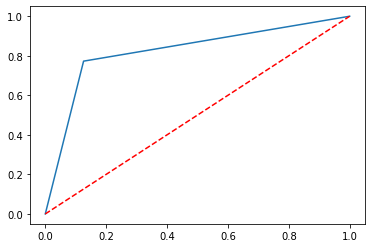

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train,predictions_train)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [ ]:
probTest = model1.predict_proba(X_test)
prob_test = probTest[:,1]
prob2 = pd.DataFrame(prob_test)
prob2.to_csv('TestProbability.csv') 
files.download('TestProbability.csv')

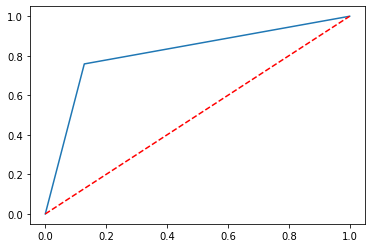

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,predictions_test)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [ ]:
## AUC For Testing Data 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_test, predictions_test)
print('AUC: %.2f' % auc1)

AUC: 0.82


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [ ]:
model.save('model1.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()

AttributeError: ignored

In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model1, 'xgBoostnew.pkl') 
  
# Load the model from the file 
#knn_from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
#knn_from_joblib.predict(X_test) 

files.download('xgBoostnew.pkl')